# Prediciton (Classification) the Types of Trees.

### This Jupyter Notebook contains;
   - Classification Models for Predicting the Types of Trees,
   - Visualization of the Result.

### What I Plan to implement in terms of ML models :
  - SVM (I will use ``LinearSVC`` model from``sklearn.svm`` module),
  - XGBoost (I will use ``XGBClassifier`` model from``xgboost`` module)
  - Additionally :
       - Decision Tree (I will use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
       - KNN (I will use ``KNeighborsClassifier`` model from ``sklearn.neighbors`` module)
       - LGBM (I will usem ``LGBMClassifier`` model from ``lightgbm`` module).
       
### I will use `yellowbrick`, `seaborn` and `matplotlib` modules to visualize the model results.

### Importing ``covtype1.csv`` dataset for modelling and required libraries.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

### Reading dataset with `pandas`

In [135]:
df = pd.read_csv("covtype1.csv")

In [8]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Square_Hypo_Distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro
0,2596,51,3,510,221,232,6279,1,0,0,...,0,0,0,0,0,0,5,66564,384,1298
1,2590,56,2,390,220,235,6225,1,0,0,...,0,0,0,0,0,0,5,44980,301,1292
2,2804,139,9,3180,234,238,6121,1,0,0,...,0,0,0,0,0,0,2,76049,1724,1434
3,2785,155,18,3090,238,238,6211,1,0,0,...,0,0,0,0,0,0,2,72488,1666,1451
4,2595,45,2,391,220,234,6172,1,0,0,...,0,0,0,0,0,0,5,23410,272,1297


### Modeling

In [23]:
X = df.drop("Cover_Type", axis = 1)

In [24]:
y = df["Cover_Type"]

- Splitting the data set into two pieces : Test split - Train split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### ``XGBoost Classifer``

In [26]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
y_predicted = xgb_classifier.predict(X_test)

In [31]:
y_predicted

array([7, 3, 3, ..., 1, 3, 2], dtype=int64)

In [44]:
xgb_accuracy = accuracy_score(y_test, y_predicted)

In [45]:
# Very good!

xgb_accuracy

0.8714599602298091

**Now, I would like to show three plots for the results.**
- Class Prediction Error Bar Plot
- Confusion Matrix
- Classification Report

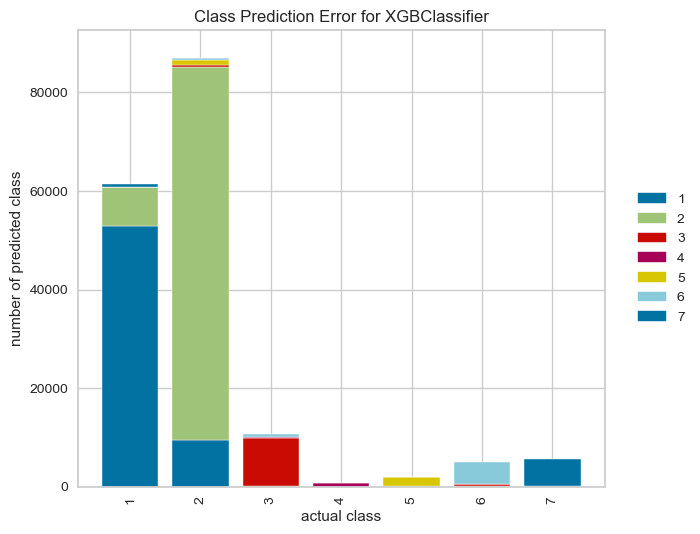

In [42]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(xgb_classifier)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

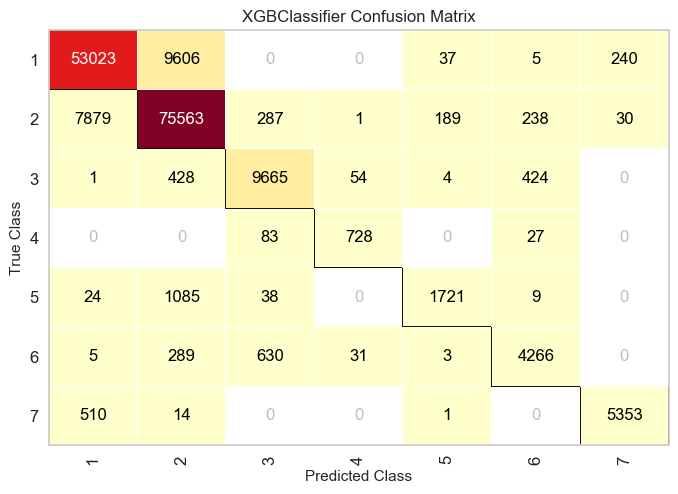

In [41]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(xgb_classifier)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show()

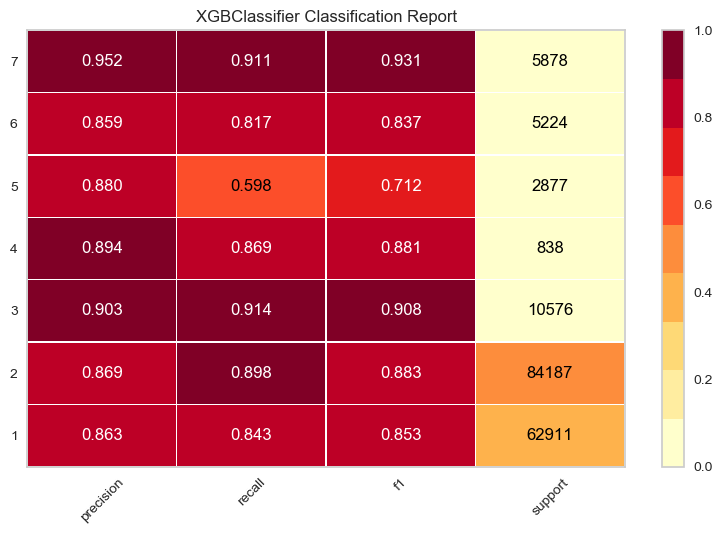

In [43]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB

from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

visualizer = ClassificationReport(xgb_classifier, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

- There is a little bit low `recall` score of the class ``5``. I conclueded that it is caused by the values in the data set. %59.8 of the class ``5`` is predicted true. Although the ``recall`` score level of class ``5`` is a little bit low, ``precision`` and ``f1`` score is quite well.

### ``LinearSVC``

In [111]:
modelSVM = LinearSVC()

In [112]:
modelSVM.fit(X_train , y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [114]:
pred = modelSVM.predict(X_test)

In [115]:
SVM_accuracy = accuracy_score(pred, y_test)

In [116]:
SVM_accuracy

0.23831968044709578

- It seems the model is failed. I decided to drop additional columns ('Average_Dist_Road_Hydro', 'Average_Elevation_Hydro') and re-split the dataset.

In [68]:
df['Square_Hypo_Distance'] = np.sqrt(df['Square_Hypo_Distance'])
df1 = df.drop(['Average_Dist_Road_Hydro','Average_Elevation_Hydro'], axis = 1)
X1 = df1.drop("Cover_Type", axis = 1)
y1 = df1["Cover_Type"]

- Splitting the data set into two pieces : Test split - Train split

In [96]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=101)

In [118]:
modelSVM1 = LinearSVC()

In [119]:
modelSVM1.fit(X1_train , y1_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [120]:
pred1 = modelSVM1.predict(X1_test)

In [121]:
SVM_accuracy1 = accuracy_score(pred1, y1_test)

In [122]:
SVM_accuracy1

0.5566145480054032

- I've doubled the **accuracy score** but it's still insufficient. SVM Classifier ;
   - SVM has been widely used in finance. For example, predicting stock price via SVM has been a acknowledged application in the industry.
   - In classification of text and handwritten objects, SVM performs well.
   - It may not be very successful in datasets with more than 100,000 data.

**Now, I would like to show three plots for the results.**
- Class Prediction Error Bar Plot
- Confusion Matrix
- Classification Report

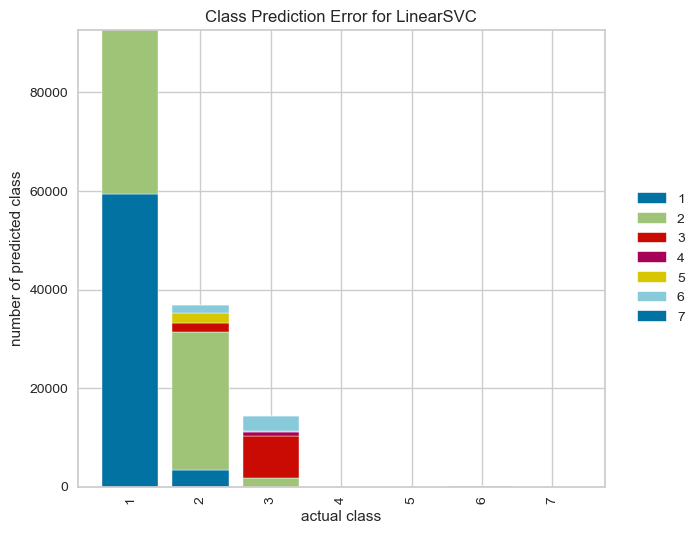

In [123]:
visualizer = ClassPredictionError(modelSVM1)

# Fit the training data to the visualizer
visualizer.fit(X1_train, y1_train)

# Evaluate the model on the test data
visualizer.score(X1_test, y1_test)

# Draw visualization
visualizer.show()

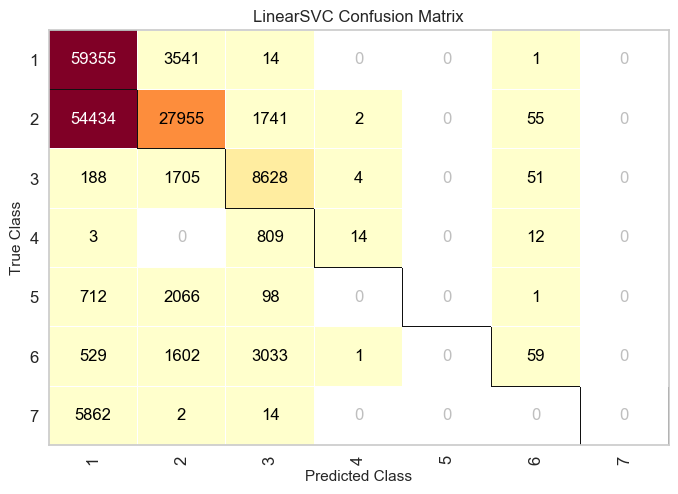

In [125]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(modelSVM1)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X1_train, y1_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X1_test, y1_test)

cm.show()

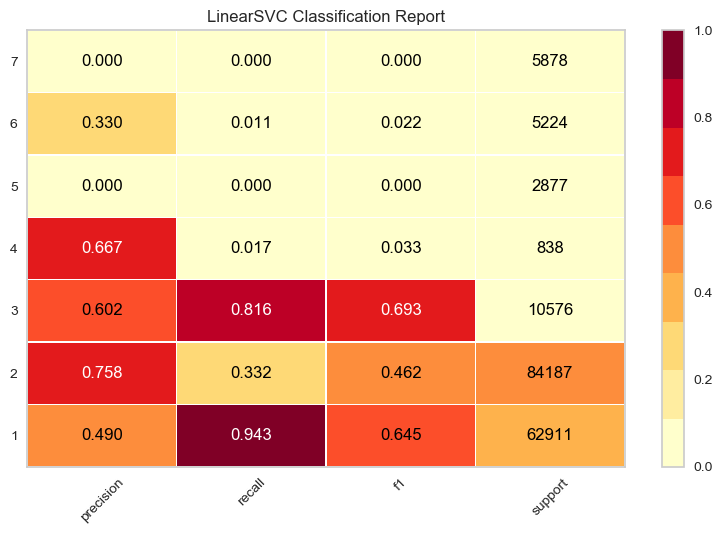

In [126]:
visualizer = ClassificationReport(modelSVM1, support=True)

visualizer.fit(X1_train, y1_train)        # Fit the visualizer and the model
visualizer.score(X1_test, y1_test)        # Evaluate the model on the test data
visualizer.show() 

- We can see from the plots that more than half of the classes are predicted correctly. But the model predicted 5 classes although there are 7. Class 5 and 7 could not detected.

### ``DecisionTreeClassifier``

In [47]:
modelTree = DecisionTreeClassifier()

In [48]:
modelTree.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
pred = modelTree.predict(X_test)

In [50]:
tree_accuracy = accuracy_score(pred, y_test)

In [51]:
# Quite well!

tree_accuracy

0.9354517047266234

**Now, I would like to show three plots for the results.**
- Class Prediction Error Bar Plot
- Confusion Matrix
- Classification Report

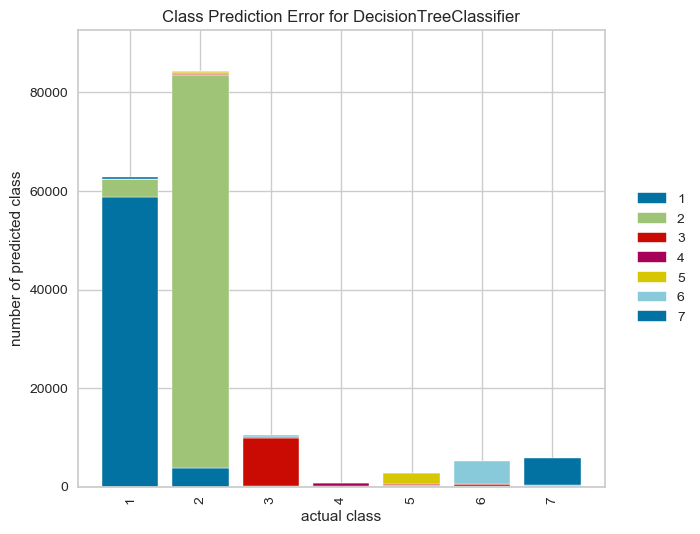

In [54]:
visualizer = ClassPredictionError(modelTree)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

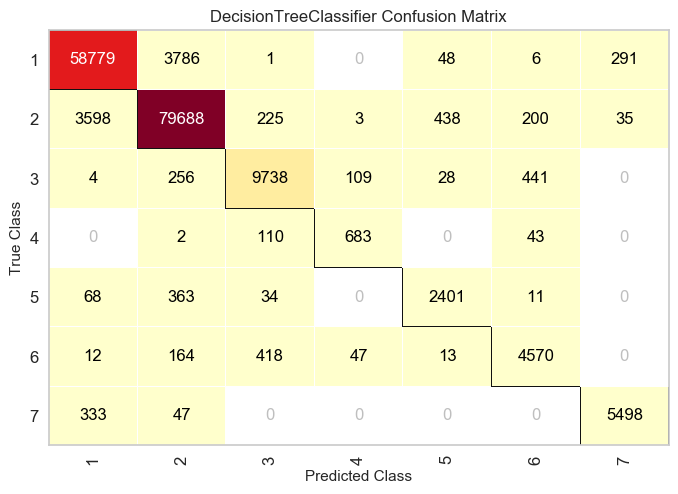

In [53]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(modelTree)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show()

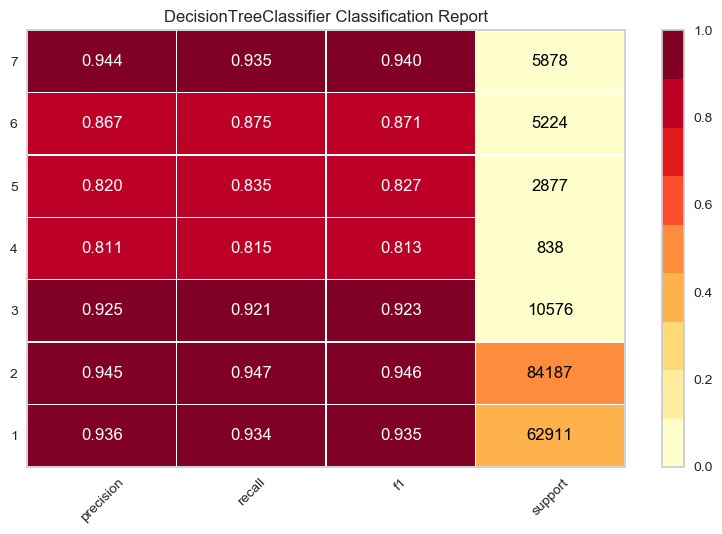

In [52]:
visualizer = ClassificationReport(modelTree, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

### ``KNeighborsClassifer``

- Deciding the number of neighbors

In [55]:
neighbors = np.arange(1, 7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

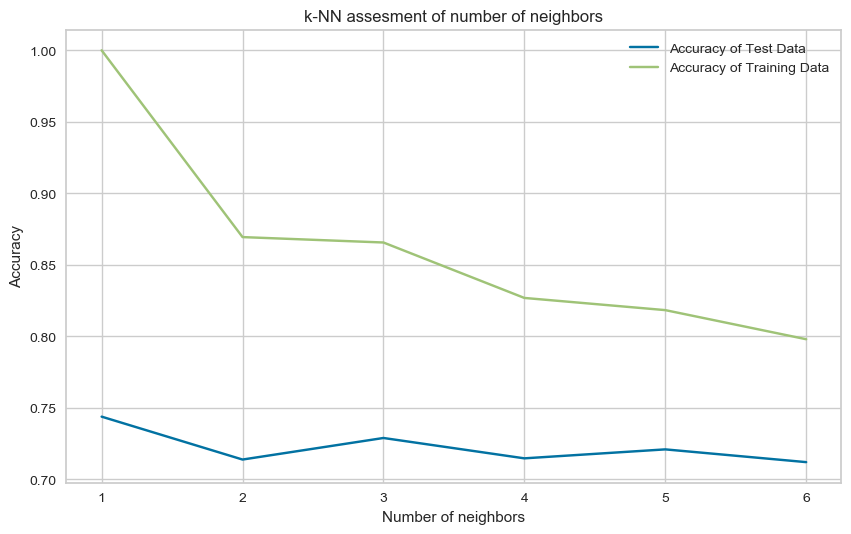

In [56]:
plt.figure(figsize=(10,6))
plt.title('k-NN assesment of number of neighbors')
plt.plot(neighbors, test_accuracy, label='Accuracy of Test Data')
plt.plot(neighbors, train_accuracy, label='Accuracy of Training Data')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

- **The graph lines stabilize around 5. So, Let's try 5 neighbors**. Let's prepare the train and test data for KNN Model.

In [101]:
knn5 = KNeighborsClassifier(n_neighbors = 5)

In [102]:
knn5.fit(X1_train,y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [103]:
knn_accuracy = knn5.score(X1_test,y1_test)

In [104]:
# Excellent!

knn_accuracy

0.962745882393864

**Now, I would like to show three plots for the results.**
- Class Prediction Error Bar Plot
- Confusion Matrix
- Classification Report

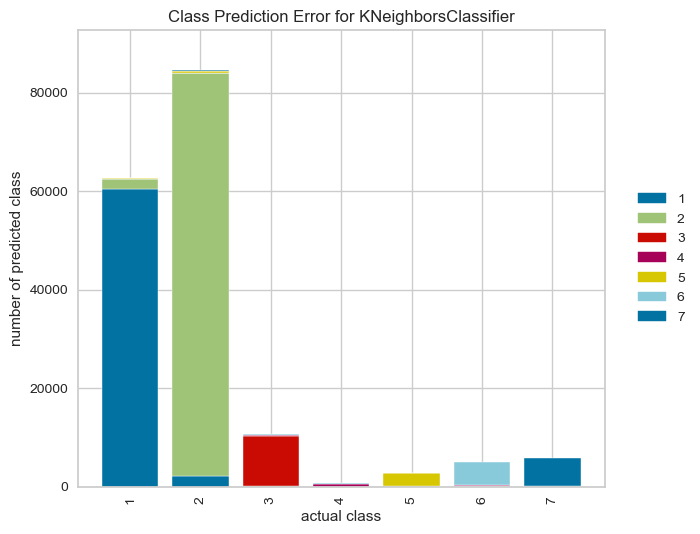

In [108]:
visualizer = ClassPredictionError(knn5)

# Fit the training data to the visualizer
visualizer.fit(X1_train, y1_train)

# Evaluate the model on the test data
visualizer.score(X1_test, y1_test)

# Draw visualization
visualizer.show()

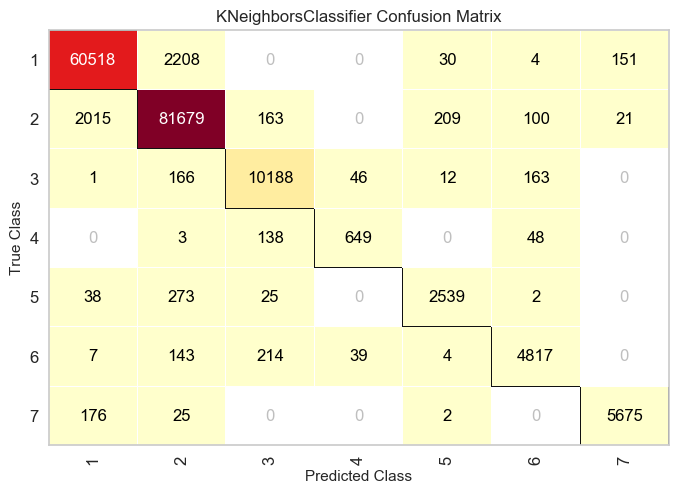

In [109]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(knn5)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X1_train, y1_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X1_test, y1_test)

cm.show()

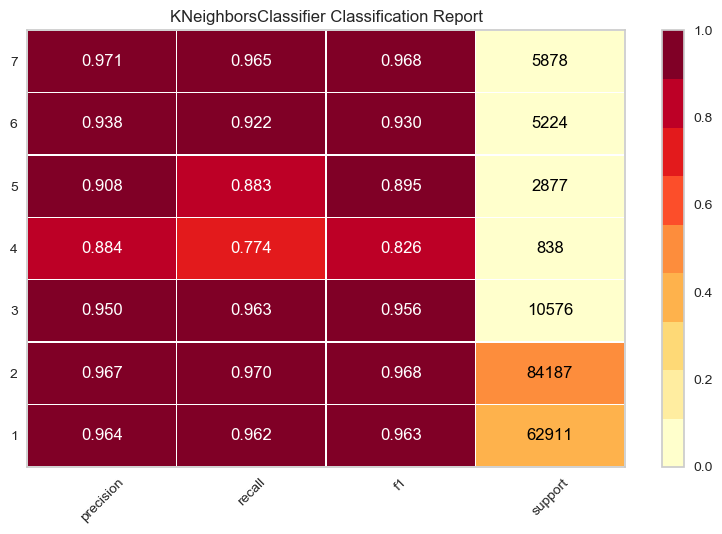

In [110]:
visualizer = ClassificationReport(knn5, support=True)

visualizer.fit(X1_train, y1_train)        # Fit the visualizer and the model
visualizer.score(X1_test, y1_test)        # Evaluate the model on the test data
visualizer.show() 

### `LGBMClassifier`

In [77]:
from lightgbm import LGBMClassifier

In [80]:
lgbm_classifier = LGBMClassifier()

In [81]:
lgbm_classifier.fit(X_train, y_train)
y_predicted = lgbm_classifier.predict(X_test)

In [127]:
lgbm_accuracy = accuracy_score(y_test, y_predicted)

In [128]:
# Very good..

lgbm_accuracy

0.8332782579960694

**Now, I would like to show three plots for the results.**
- Class Prediction Error Bar Plot
- Confusion Matrix
- Classification Report

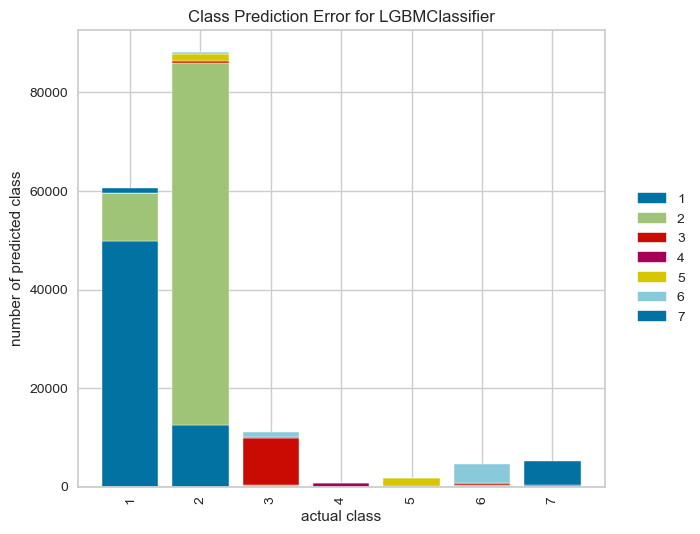

In [130]:
visualizer = ClassPredictionError(lgbm_classifier)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

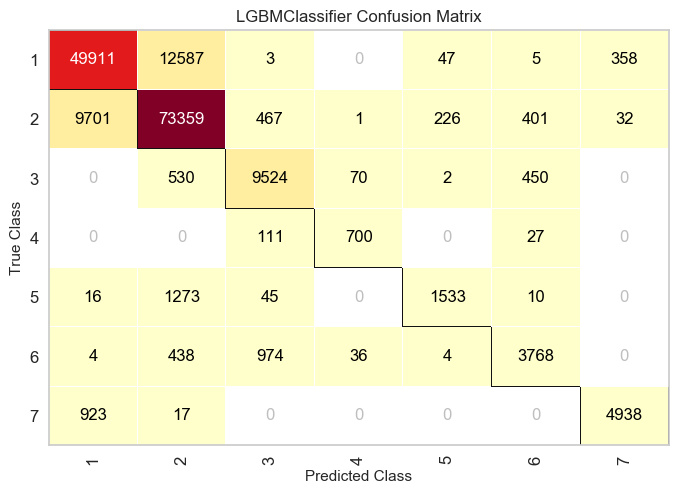

In [131]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(lgbm_classifier)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show()

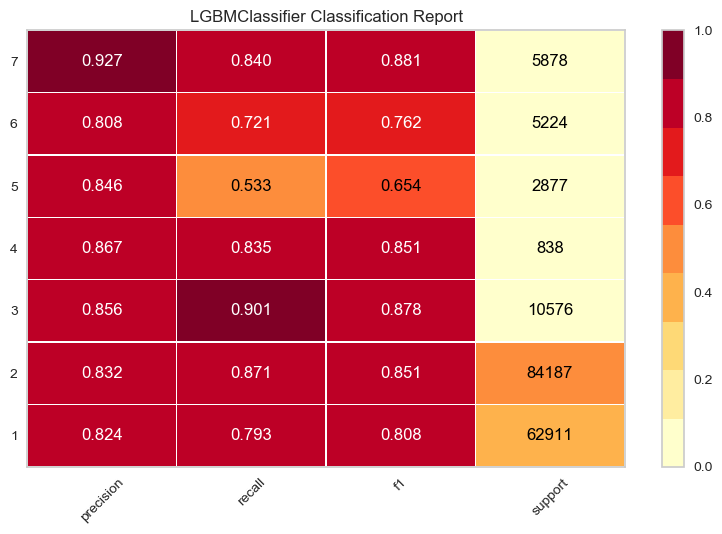

In [132]:
visualizer = ClassificationReport(lgbm_classifier, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

Text(0.5, 1.0, 'Accuracy Score of Different Models')

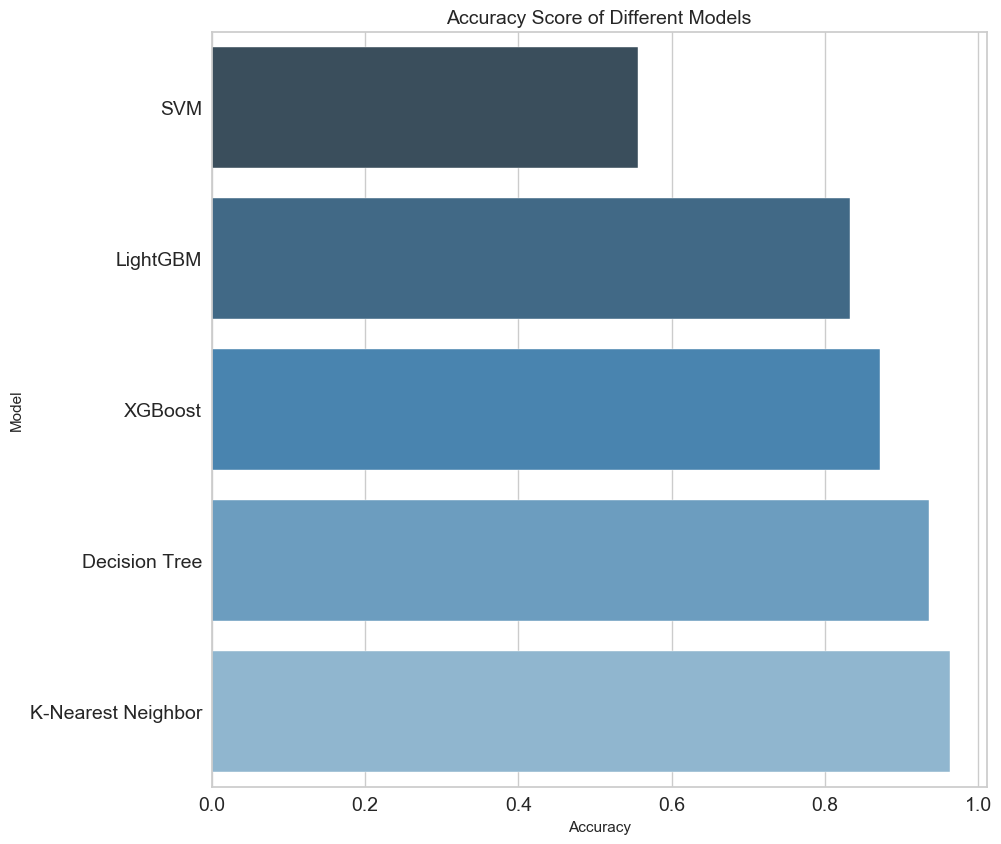

In [134]:
compare = pd.DataFrame({"Model": ["K-Nearest Neighbor", "LightGBM", "XGBoost", "Decision Tree", "SVM"],
                        "Accuracy": [knn_accuracy, lgbm_accuracy, xgb_accuracy, tree_accuracy, SVM_accuracy1]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Accuracy Score of Different Models", size=14)

### Overall Results :
- The overall evaluation in terms of `accuracy scores` is displayed above.
- The model with the least performance is SVM. 
   - SVM has been widely used in finance. For example, predicting stock price via SVM has been a acknowledged application in the industry.
   - In classification of text and handwritten objects, SVM performs well.
   - It may not be very successful in datasets with more than 100,000 data (We have half a million).
   - It also doesn't perform well against unstable data (`Cover_Type`).
- `XGBoost` has performed well enough. As in ``linear regression`` models, it has proven its success in ``clasification`` once again.
   - There is a little bit low `recall` score of the class ``5``. 
   - I conclueded that it is caused by the values in the data set. %59.8 of the class ``5`` is predicted true. 
   - Although the ``recall`` score level of class ``5`` is a little bit low, ``precision`` and ``f1`` score is quite well.
- All the other Models (``K-Nearest Neighbor``, ``LightGBM``, ``Decision Tree``) are quite well. They all have performed well and given high accuracy scores.
- Multi Class Classification is ``KNN``'s job...

Best Regards..